<a href="https://colab.research.google.com/github/marciro/posdatascience/blob/master/Exercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cars = pd.read_csv('carros.csv', sep=',', decimal='.')
cars.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,dealer,Manual,0


Verificando as variáveis do conjunto de dados.
Em uma análise superficial é possível verificar que podemos discretizar a variável Kms_Driven para categorias Novo, Seminovo e Usado

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


O conjunto de dados não possui variáveis contendo valores nulos, portanto não necessita de nenhum pré-processamento referente a exclusão ou transformação desses valores.


In [42]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Analisando os dados descritivos do conjunto podemos perceber que o desvio padrão do Kms_Driven é muito alto, possuindo também um valor máximo muito maior que os valores dos quartis, sinalizando um possível outlier.

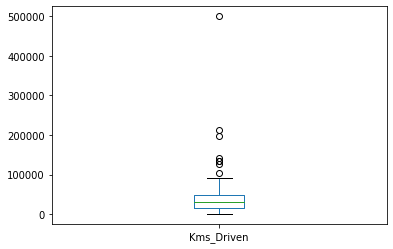

In [43]:
cars.Kms_Driven.plot.box()

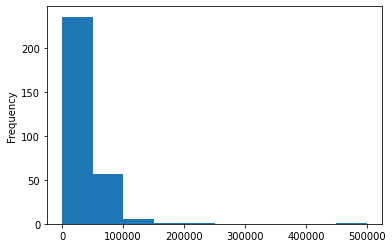

In [8]:
cars.Kms_Driven.plot.hist()

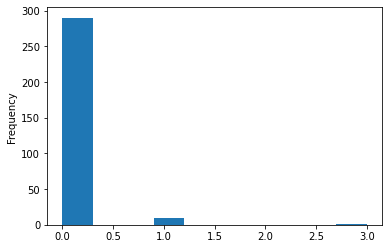

In [10]:
cars.Owner.plot.hist()

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
cars = cars.assign(kms_driven_discretized = discretizer.fit_transform(cars.Kms_Driven.values.reshape(-1, 1)))
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,kms_driven_discretized
0,ritz,2014,3.35,5.59,27000,Petrol,dealer,Manual,0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,dealer,Manual,0,2.0
2,ciaz,2017,7.25,9.85,6900,Petrol,dealer,Manual,0,0.0
3,wagon r,2011,2.85,4.15,5200,Petrol,dealer,Manual,0,0.0
4,swift,2014,4.60,6.87,42450,Diesel,dealer,Manual,0,2.0


Discretizando a variável Kms_Driven para 3 faixas (Até)

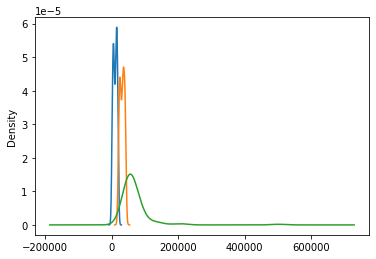

In [21]:
[ cars[cars.kms_driven_discretized == i].Kms_Driven.plot.density() for i in range(3) ]

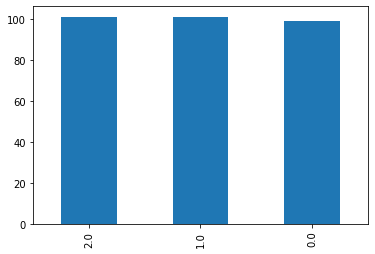

In [22]:
cars.kms_driven_discretized.value_counts().plot.bar()

In [45]:
cars.Seller_Type.value_counts() / cars.Seller_Type.value_counts().sum()

Dealer        0.498339
Individual    0.196013
individual    0.156146
dealer        0.149502
Name: Seller_Type, dtype: float64

In [48]:
cars.Seller_Type = cars.Seller_Type.apply(lambda x: x.upper())
cars.Seller_Type.value_counts()
cars.Seller_Type.value_counts() / cars.Seller_Type.value_counts().sum()

DEALER        0.647841
INDIVIDUAL    0.352159
Name: Seller_Type, dtype: float64

In [49]:
cars.Fuel_Type.value_counts() / cars.Fuel_Type.value_counts().sum()

Petrol    0.707641
Diesel    0.136213
Petro     0.086379
diesel    0.063123
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [52]:
cars.Fuel_Type = cars.Fuel_Type.apply(lambda x: x.upper())
cars.Fuel_Type.value_counts()
cars.Fuel_Type.value_counts() / cars.Fuel_Type.value_counts().sum()

PETROL    0.707641
DIESEL    0.199336
PETRO     0.086379
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [53]:
def clean_fuel_type(x: str) -> str:
  if x  == 'PETRO':
    return 'PETROL'
  else:
    return x


In [54]:
cars.Fuel_Type = cars.Fuel_Type.apply(clean_fuel_type)

In [56]:
cars.Fuel_Type.value_counts()
cars.Fuel_Type.value_counts() / cars.Fuel_Type.value_counts().sum()

PETROL    0.794020
DIESEL    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [59]:
cars.Transmission = cars.Transmission.apply(lambda x: x.upper())
cars.Transmission.value_counts()
cars.Transmission.value_counts() / cars.Transmission.value_counts().sum()

MANUAL       0.86711
AUTOMATIC    0.13289
Name: Transmission, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def build_features(df_train, df_test):
  ohe = OneHotEncoder(sparse=False)
  ohe_train = ohe.fit_transform(df_train[['Fuel_Type', 'Seller_Type', 'Transmission']])
  ohe_test = ohe.transform(df_test[['Fuel_Type', 'Seller_Type', 'Transmission']])
  
  mm = MinMaxScaler()
  mm_train = mm.fit_transform(df_train[['Present_Price']])
  mm_test = mm.transform(df_test[['Present_Price']])

  x_train = np.hstack([ohe_train, mm_train])
  x_test = np.hstack([ohe_test, mm_test])

  y_train = df_train.Selling_Price .values
  y_test = df_test.Selling_Price.values
  
  return x_train, y_train, x_test, y_test  

 
def build_model():
  return LinearRegression()
  
cv = KFold(n_splits=5, shuffle=True)
mean_r2 = np.zeros(shape=(1, 5, 2))

for fold, (train, test) in enumerate(cv.split(cars)):
  cars_train = df_insurance.iloc[train]
  cars_test = df_insurance.iloc[test]

# computar as features
x_train, y_train, x_test, y_test = build_features(df_train, df_test)
# treinar o modelo
model = build_model()
model.fit(x_train, y_train)
    
# coletar os resultados
y_pred_train = model.predict(x_train)




